I have came accross Lending Club accidentally when looking for alternate investing to stock. The stock market has wiped out all my investment and I were looking for an investment less risky than the stock market but with a return at least 10 time higher than the interest rate offered by banks on saving or checking account. I couldn't have imagined that I will be using their data for my capstone project. To make the story short, when the instructor asked us to look for our own data for the capstone project, what came to my mind was the finance or the health care industry. I am fascinated by these two sectors: the financial sector outweighted the health sector because my fascination to understand finance mechanism is just too high and in real life this will definately be personally beneficial to me and to many people around me. I found a Lending club dataset at Kaggle.com but my goal was to use a data not used before; as a member of lending club, I logged in on their website and I downloaded the dataset for loans approved for 2012 and 2013. This data will be used to predict if a loan will be defaulted or now: the ultimate goal is to flag bad applicants that can be a drag on the business model. Before we get there we will have to clean our data, do some exploratory analysis couple with a few visualization. Our ultimate goal is to be able to see if the model we will retain could be used in the future to sort thru loan applicants and choose without bias only those that will not default on their loan.

In [1]:
#importing some of the library I may need for the completion of this project. I will add additional library if needed.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [2]:
#importing the data
data = pd.read_csv('LoanStats2012_2013.csv', low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10149488,NaN,4800.0,4800.0,4800.0,36 months,10.99%,157.13,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,10129454,NaN,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,10149342,NaN,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10148122,NaN,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,10159498,NaN,12000.0,12000.0,12000.0,36 months,6.62%,368.45,A,A2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188183 entries, 0 to 188182
Columns: 150 entries, id to settlement_term
dtypes: float64(114), object(36)
memory usage: 215.4+ MB


In [4]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

Most of the columns are not displaying when we run the cell above. After cleaning the data we must find a way to display all columns that way we can start to eliminate columns that may not be usefull for our project.

In [5]:
data.shape

(188183, 150)

We have 150 columns and 188183 rows in our data; most of these columns were generated after the loans were issued. Since we want to predict if a loan is good or bad we will consider use mostly the columns post loan approval couple with a few column generated after loans issuance.These are the columns that will be retained: loan_amnt, term, int_rate, installment, emp_length, home_ownership, annual_inc, verification_status, purpose, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, acc_now_delinq, delinq_amnt, pub_rec_bankruptcies, loan_status. The Lending Club website has provided a dictionary of explanation of all the expressions used to name the columns; a copy of the dictionary will be submitted with this project. All other columns will be dropped.We will display all the columns and then drop all the ones we don't need.

In [6]:
#Displaying all the columns in my data.
cols = data.columns.tolist()
cols

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [7]:
#Dropping the data not needed for the project
clean_data = data.drop(columns=['id', 'member_id', 'issue_d', 'pymnt_plan', 'url', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term'], axis=1)
clean_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,4800.0,4800.0,4800.0,36 months,10.99%,157.13,B,B2,Surgical Technician,2 years,...,759.0,2.0,3.0,0.0,4136.0,16.10%,8.0,0.0,0.0,0.0
1,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,Project Manager,4 years,...,724.0,1.0,15.0,0.0,7137.0,24%,18.0,0.0,0.0,0.0
2,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,...,734.0,0.0,14.0,0.0,36638.0,61.20%,27.0,0.0,0.0,0.0
3,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,Systems Engineer,3 years,...,709.0,0.0,17.0,0.0,13248.0,55.70%,30.0,0.0,0.0,0.0
4,12000.0,12000.0,12000.0,36 months,6.62%,368.45,A,A2,MANAGER INFORMATION DELIVERY,10+ years,...,764.0,1.0,12.0,0.0,13168.0,21.60%,22.0,0.0,0.0,0.0


In [8]:
#Let us take a look at our remaining columns and see if we still have to eliminate more.
clean_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

These 5 columns can be dropped:'funded_amnt', 'funded_amnt_inv', 'acc_now_delinq', 'delinq_amnt' and 'sub_grade'; sub_grade appears to be redundant with grade and zip_code is redundant with addr_state; we will keep zip_code for now. The other columns were generated after the loans were issued and will impact the model if used.

In [9]:
clean_data = clean_data.drop(columns=['funded_amnt', 'funded_amnt_inv', 'acc_now_delinq', 'delinq_amnt', 'sub_grade'], axis=1)
clean_data.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,4800.0,36 months,10.99%,157.13,B,Surgical Technician,2 years,MORTGAGE,39600.0,Source Verified,...,Aug-95,755.0,759.0,2.0,3.0,0.0,4136.0,16.10%,8.0,0.0
1,12000.0,36 months,10.99%,392.81,B,Project Manager,4 years,RENT,60000.0,Not Verified,...,9-Dec,720.0,724.0,1.0,15.0,0.0,7137.0,24%,18.0,0.0
2,27050.0,36 months,10.99%,885.46,B,Team Leadern Customer Ops & Systems,10+ years,OWN,55000.0,Verified,...,Oct-86,730.0,734.0,0.0,14.0,0.0,36638.0,61.20%,27.0,0.0
3,12000.0,36 months,7.62%,373.94,A,Systems Engineer,3 years,MORTGAGE,96500.0,Not Verified,...,3-Sep,705.0,709.0,0.0,17.0,0.0,13248.0,55.70%,30.0,0.0
4,12000.0,36 months,6.62%,368.45,A,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000.0,Not Verified,...,Mar-94,760.0,764.0,1.0,12.0,0.0,13168.0,21.60%,22.0,0.0


In [10]:
#We will now check for missing data in our columns and see if we can replace them.
clean_data.isna().sum()

loan_amnt                   2
term                        2
int_rate                    2
installment                 2
grade                       2
emp_title               11739
emp_length               7889
home_ownership              2
annual_inc                  2
verification_status         2
loan_status                 2
purpose                     2
zip_code                    2
addr_state                  2
dti                         2
delinq_2yrs                 2
earliest_cr_line            2
fico_range_low              2
fico_range_high             2
inq_last_6mths              2
open_acc                    2
pub_rec                     2
revol_bal                   2
revol_util                127
total_acc                   2
pub_rec_bankruptcies        2
dtype: int64

empl_title and emp_length have more missing values than the other columns, just deleting the rows with missing values may make us loss valuable information in some columns, we will replace the missing values in those rows with the mean for emp_length and the mode for emp_title. After doing the value counts as per the cell below it will be problematic to just replace the NaN by the mode as stated, I will drop the column 'emp_title'.

In [11]:
clean_data['emp_title'].value_counts()

Teacher                                   833
Manager                                   666
US Army                                   491
RN                                        389
Registered Nurse                          356
Bank of America                           341
Supervisor                                304
AT&T                                      279
Kaiser Permanente                         261
USPS                                      258
Project Manager                           256
USAF                                      247
Walmart                                   231
UPS                                       221
Sales                                     218
Office Manager                            210
General Manager                           209
manager                                   197
Director                                  187
Department of Defense                     184
Driver                                    184
Engineer                          

In [12]:
#Dropping the column emp_title
clean_data = clean_data.drop(columns=['emp_title'], axis=1)

In [13]:
clean_data['emp_length'].value_counts()

10+ years    61199
2 years      16146
5 years      14270
3 years      13967
< 1 year     13224
6 years      11918
1 year       11434
7 years      11211
4 years      10847
8 years       8952
9 years       7126
Name: emp_length, dtype: int64

In [14]:
# Before doing the replacement we also need to remove 'years' and 'year' from the rows and combine "< 1 year " and "1 year " together
map = { "< 1 ":1, "1 ":1, "2 ":2, "3 ":3, "4 ":4, "5 ":5, "6 ":6, "7 ":7, "8 ":8, "9 ":9, "10+ ":10}
clean_data.emp_length = clean_data.emp_length.str.replace("years","")
clean_data.emp_length = clean_data.emp_length.str.replace("year","")
clean_data.emp_length.replace(map, inplace=True)
mean = clean_data['emp_length'].mean()
clean_data['emp_length'].fillna(mean, inplace=True)

In [15]:
#Let look at the NaN again
clean_data.isna().sum()

loan_amnt                 2
term                      2
int_rate                  2
installment               2
grade                     2
emp_length                0
home_ownership            2
annual_inc                2
verification_status       2
loan_status               2
purpose                   2
zip_code                  2
addr_state                2
dti                       2
delinq_2yrs               2
earliest_cr_line          2
fico_range_low            2
fico_range_high           2
inq_last_6mths            2
open_acc                  2
pub_rec                   2
revol_bal                 2
revol_util              127
total_acc                 2
pub_rec_bankruptcies      2
dtype: int64

In [16]:
#Dropping all the remaining NAN
clean_data = clean_data.dropna()
clean_data.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

In [17]:
clean_data.shape

(188056, 25)

Exploratory Data Analysis

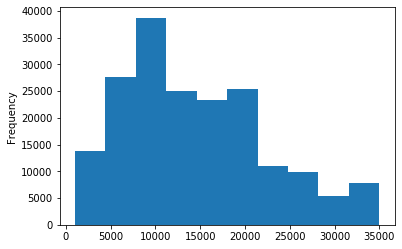

In [18]:
#Visualising the different loan amounts present in this lending club data.
clean_data['loan_amnt'].plot(kind="hist", bins=10)

10000 dollars appears to be the amount of loan the most provided while 30000 is the lowest.

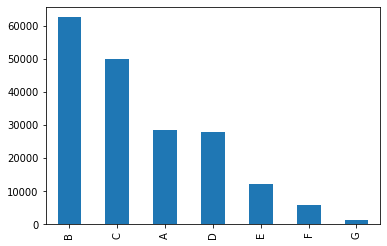

In [19]:
#Visualising the number of loans per grade
clean_data['grade'].value_counts().plot(kind='bar')


We have 7 differents grade assigned to the loans. According to lending club website these grades are linked to the loan quality in the crescendo order of A thru G. This imply that must of the loans are of high standard, grade B appears to be dominant.

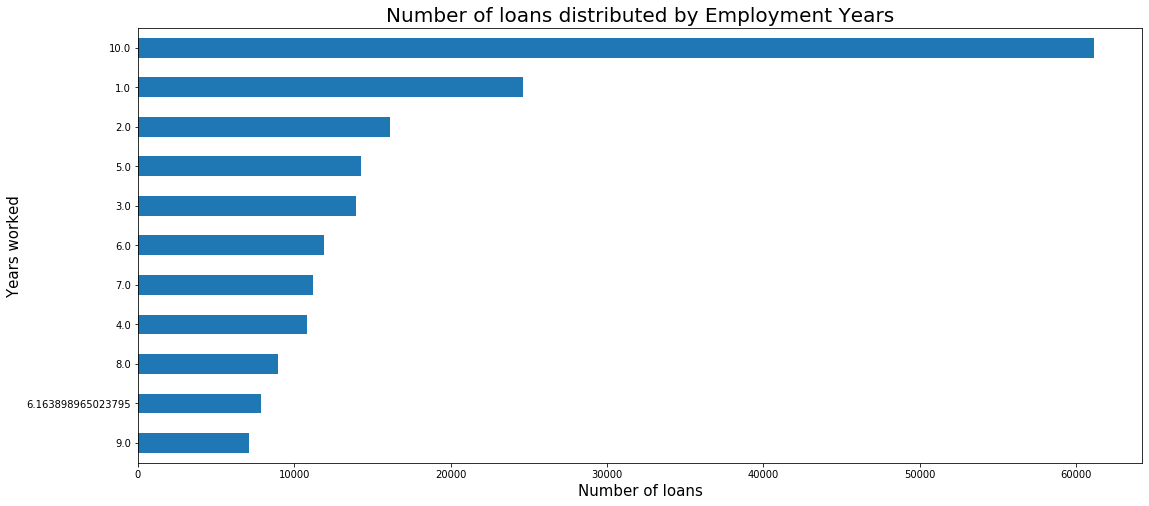

In [20]:
#Visualizing the number of loans per length of employment
clean_data['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

Those who have worked 10 years or more are taken more loans than any other group: here the assumption could be that those who have worked for more years tends to spend more on improving the quality of their life and may end up racking up more loan to achieve this goal; the have also built their credit over a long period of time and will be approved for a loan easily than any other group. We could verify this assumption by identify the reason why these people took their loan.

In [21]:
# Loans data for borrowers with employement length 10 years or more
clean_data_10 = clean_data[clean_data.emp_length == 10]
clean_data_10.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
2,27050.0,36 months,10.99%,885.46,B,10.0,OWN,55000.0,Verified,Fully Paid,...,Oct-86,730.0,734.0,0.0,14.0,0.0,36638.0,61.20%,27.0,0.0
4,12000.0,36 months,6.62%,368.45,A,10.0,MORTGAGE,105000.0,Not Verified,Fully Paid,...,Mar-94,760.0,764.0,1.0,12.0,0.0,13168.0,21.60%,22.0,0.0
8,12000.0,36 months,11.99%,398.52,B,10.0,MORTGAGE,130000.0,Source Verified,Fully Paid,...,Nov-97,715.0,719.0,1.0,9.0,0.0,10805.0,67%,19.0,0.0
11,11100.0,36 months,14.98%,384.68,C,10.0,MORTGAGE,90000.0,Not Verified,Fully Paid,...,1-Jun,690.0,694.0,0.0,9.0,0.0,6619.0,66.20%,12.0,0.0
12,12000.0,36 months,13.53%,407.40,B,10.0,RENT,40000.0,Source Verified,Fully Paid,...,Oct-98,660.0,664.0,0.0,7.0,2.0,5572.0,68.80%,32.0,0.0


In [22]:
#loan purpose for  borrowers with employement length 10 years or more
clean_data_10['purpose'].value_counts()

debt_consolidation    37471
credit_card           13659
home_improvement       3688
other                  2702
major_purchase          995
small_business          732
medical                 479
car                     451
vacation                267
house                   267
wedding                 241
moving                  172
renewable_energy         32
Name: purpose, dtype: int64

Debt consolidation appears to be the major purpose why this group is taken out more peers to peer loan follow by credit card, this somehow confirm our assumption.

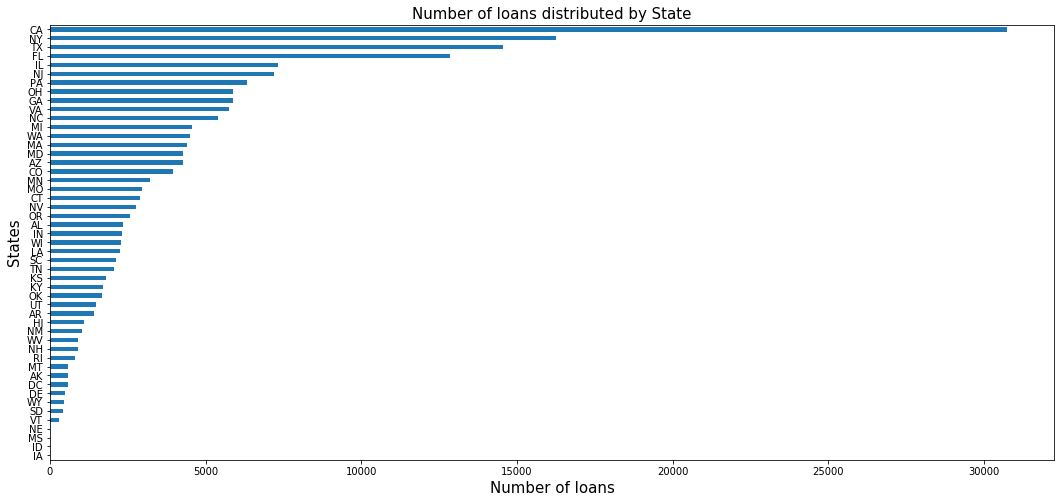

In [23]:
#Distribution of loans by States
clean_data['addr_state'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('States',fontsize=15);

The 4 most populous States have the highest number of loans. This doesn't give us any meaninful information. If we add a column with the State population and do the number of loan per capita then we will have a way to compare all the States and rank them from the most borrowers to the least.We will get the population by State and determine which State has the more loan per capita and also determine the State with the more defaulters per capita. Using Excel and its calculator I was able to obtain the number of loans per capita and the first 10 States that borrow the most will be display below and the 10 States borrowing less will also be displayed. Please note that the State of Iowa doesn't have any borrowers from lending club in the data we used.

In [24]:
#Loans per capita of the States
States_loans_per_capita = pd.read_csv('US_population_2013.csv')
States_loans_per_capita.head()

,United States,"326,687,501",No_of_loans,No_of_loans_per_capita
0,NV,"3,027,341","2,769",0.000915
1,RI,"1,058,287",800,0.000756
2,CT,"3,571,520","2,906",0.000814
3,NJ,"8,886,025","7,212",0.000812
4,MD,"6,035,802","4,287",0.000710


In [25]:
#setting United States as index for the Dataframe above
States_loans_per_capita = States_loans_per_capita.set_index('United States')

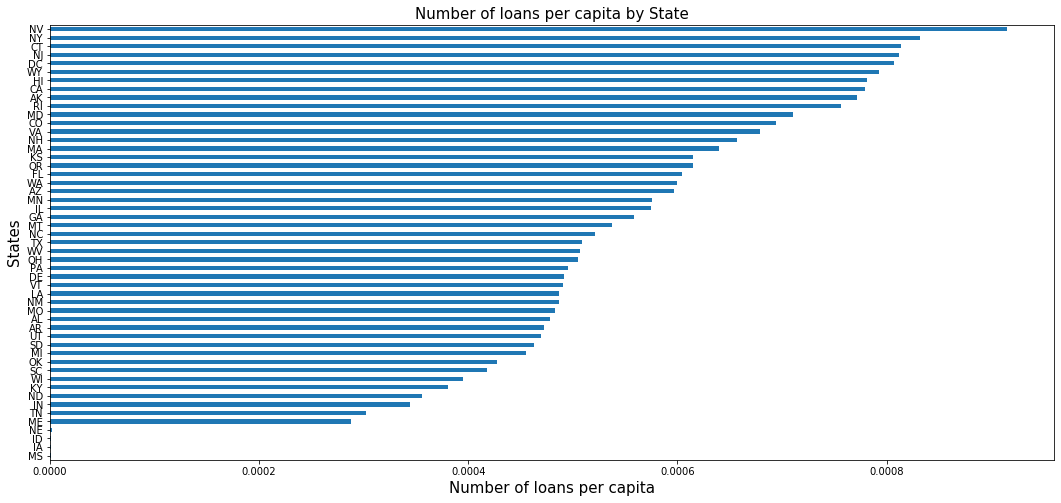

In [26]:
#Visualizing the Distribution of loans by States per capita
States_loans_per_capita['No_of_loans_per_capita'].sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans per capita by State',fontsize=15)
plt.xlabel('Number of loans per capita',fontsize=15)
plt.ylabel('States',fontsize=15);

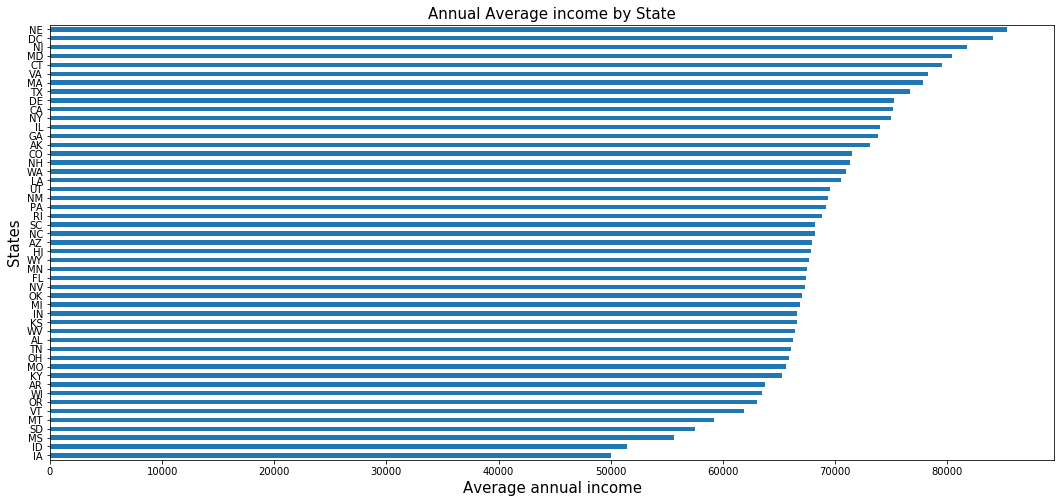

In [27]:
#looking at the annual average income by State.
clean_data.groupby('addr_state')['annual_inc'].mean().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Annual Average income by State',fontsize=15)
plt.xlabel('Average annual income',fontsize=15)
plt.ylabel('States',fontsize=15);

Based on the result above, Nevada, New York, Connecticut, New Jersey and DC have the highest number of Lending Club borrowers per capita. California, the most populous State actually come at the eighth position, this imply that, the peers to peers lending is a Business model that still need to be expanded: it is a Business model less harsh on the borrowers as are the pay days loan with higher interest rate some time not affordable at all to the common folks. Amount the top 10 borrowers, only 5 States top earners are in. We can not draw a conclusion as far as correlation between income and borrowing. WY and NV appears to be peculiar case, they are ranged 26th and 29th in the earners but are 6th and first borrowers. The States in the middle income wise tend to borrow more than the top earners.

We will look in one State in particular to see how the peer to peer loans stack up by zipcodes and by income. We reside in Maryland and will choose this State for the look up these information.

In [28]:
#Slicing the State of Maryland from the bigger data.
clean_data_MD = clean_data[clean_data.addr_state == 'MD']
clean_data_MD.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
95,10000.0,36 months,11.99%,332.10,B,2.0,RENT,110000.0,Not Verified,Fully Paid,...,Jun-93,675.0,679.0,1.0,11.0,0.0,6663.0,65.30%,31.0,0.0
98,16000.0,36 months,16.99%,570.37,D,9.0,RENT,80456.0,Source Verified,Fully Paid,...,4-Jun,665.0,669.0,2.0,18.0,0.0,26516.0,63.30%,37.0,0.0
136,10000.0,60 months,22.40%,278.47,E,8.0,RENT,36000.0,Verified,Fully Paid,...,Oct-94,680.0,684.0,2.0,10.0,0.0,7592.0,67.80%,25.0,0.0
173,9600.0,36 months,9.67%,308.28,B,3.0,MORTGAGE,80000.0,Not Verified,Fully Paid,...,1-Oct,670.0,674.0,0.0,14.0,0.0,8641.0,40.60%,34.0,0.0
234,1200.0,36 months,13.98%,41.01,C,10.0,OWN,103000.0,Source Verified,Fully Paid,...,1-Jun,670.0,674.0,1.0,9.0,0.0,5140.0,75.60%,40.0,0.0


In [29]:
clean_data_MD.shape

(4285, 25)

In [30]:
#Determining the number of loan per zip codes for the State of Maryland in our data.
clean_data_MD.zip_code.value_counts()

207xx    775
212xx    696
210xx    549
208xx    514
211xx    430
217xx    394
206xx    275
209xx    255
216xx    101
218xx     91
214xx     83
219xx     68
215xx     49
021xx      2
173xx      1
200xx      1
317xx      1
Name: zip_code, dtype: int64

We do have a total of 17 zipcodes represented, but only the first three digits are represented. We will have to look on a Maryland map to match the zipcodes to the counties they are representing; some zip codes span accross multiple counties, we will do some oversimplification by matching the higher number of zip codes with the locality where they are represented the most.The zip codes 021xx, 200xx, 173xx and 317xx don't belong to the State of Maryland and will not be considered. The remaining 13 zip codes will be matched with the counties where they are represented the most:207xx: Prince Georges, 212xx: Baltimore city, 210xx: Harford, 208xx and 209xx: Montgomery, 211xx: Baltimore county, 217xx: Frederick, 206xx: Charles, St Mary and Calvert, 216xx: Caroline, Queen Anne, Kent and Talbot, 218xx: Wilcomico, 214xx: Anne Arundel, 219xx: Cecil, 215xx: Allegany. We will replace the zip codes by the different localities and try to see the loan per capita and the level of income in each County.

In [31]:
#Replacing the zip codes by the Counties based on Maryland map of zip codes
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('207xx', 'Prince Georges')
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('212xx', 'Baltimore city')
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('210xx', 'Harford')
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('208xx', 'Montgomery')
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('209xx', 'Montgomery')
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('211xx', 'Baltimore county')
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('217xx', 'Frederick')
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('206xx', 'Charles, St Mary and Calvert')
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('216xx', 'Caroline, Queen Anne, Kent and Talbot')
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('218xx', 'Wilcomico')
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('214xx', 'Anne Arundel')
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('219xx', 'Cecil')
clean_data_MD.zip_code = clean_data_MD.zip_code.str.replace('215xx', 'Allegany')

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
clean_data_MD.zip_code.value_counts()

Prince Georges                           775
Montgomery                               769
Baltimore city                           696
Harford                                  549
Baltimore county                         430
Frederick                                394
Charles, St Mary and Calvert             275
Caroline, Queen Anne, Kent and Talbot    101
Wilcomico                                 91
Anne Arundel                              83
Cecil                                     68
Allegany                                  49
021xx                                      2
317xx                                      1
200xx                                      1
173xx                                      1
Name: zip_code, dtype: int64

In [33]:
#We will create a new DataFrame with the counties in maryland with their population and analyse peer to peer lending on this data
# initialize list of lists 
data = [['Prince_Georges', 881138], ['Montgomery', 1004709], ['Baltimore_city', 621342], ['Harford', 248622], ['Baltimore_county', 817455], ['frederick', 239582], ['Charles_St Mary_Calvert', 349207], ['Caroline_Queen_Anne_Kent_Talbot', 139602], ['Wilcomico', 100647], ['Anne_Arundel', 550488], ['Cecil', 101696], ['Allegany', 74012] ] 
  
# Create the pandas DataFrame
clean_data_MD_counties = pd.DataFrame()
clean_data_MD_counties = pd.DataFrame(data, columns = ['County', 'Population']) 
clean_data_MD_counties.head()

,County,Population
0,Prince_Georges,881138
1,Montgomery,1004709
2,Baltimore_city,621342
3,Harford,248622
4,Baltimore_county,817455


In [34]:
#Adding the number of loans per county to the DataFrame
number_of_loan = [776, 769, 696, 549, 430, 395, 275, 101, 91, 83, 68, 49]
clean_data_MD_counties['Number_of_loan'] = number_of_loan
clean_data_MD_counties.head()

,County,Population,Number_of_loan
0,Prince_Georges,881138,776
1,Montgomery,1004709,769
2,Baltimore_city,621342,696
3,Harford,248622,549
4,Baltimore_county,817455,430


In [35]:
#Calculating the loan per capita for each County
clean_data_MD_counties['Loan_per_capita'] = clean_data_MD_counties['Number_of_loan']/ clean_data_MD_counties['Population']
clean_data_MD_counties.head()

,County,Population,Number_of_loan,Loan_per_capita
0,Prince_Georges,881138,776,0.000881
1,Montgomery,1004709,769,0.000765
2,Baltimore_city,621342,696,0.001120
3,Harford,248622,549,0.002208
4,Baltimore_county,817455,430,0.000526


In [36]:
#Reindexing the DataFrame
clean_data_MD_counties = clean_data_MD_counties.set_index('County')
clean_data_MD_counties.head()

,Population,Number_of_loan,Loan_per_capita
County,,,
Prince_Georges,881138,776,0.000881
Montgomery,1004709,769,0.000765
Baltimore_city,621342,696,0.001120
Harford,248622,549,0.002208
Baltimore_county,817455,430,0.000526


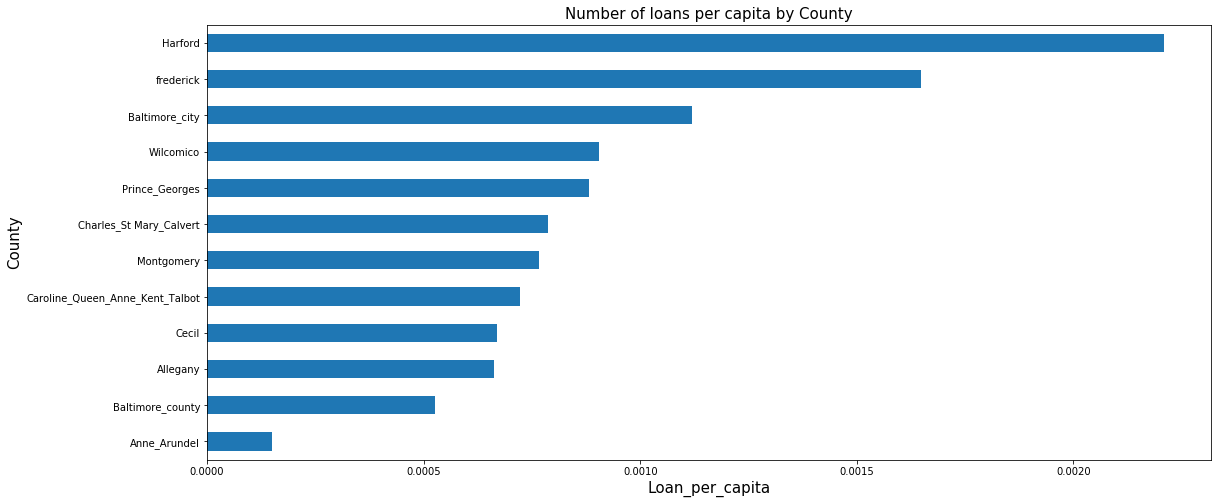

In [37]:
#Visualizing the number of loan per Capita for the Counties in Maryland.
clean_data_MD_counties['Loan_per_capita'].sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans per capita by County',fontsize=15)
plt.xlabel('Loan_per_capita',fontsize=15)
plt.ylabel('County',fontsize=15);

Harford appears to be the highest borrower folowed by Frederick and Baltimore city. We will determine what is the average income per County to see what could be influencing the the peer to peer loan in the counties.

In [38]:
clean_data_MD.groupby('zip_code')['annual_inc'].mean().sort_values()

zip_code
021xx                                     50500.000000
Allegany                                  63653.254694
Wilcomico                                 67673.663297
173xx                                     68000.000000
Baltimore city                            69076.845445
Frederick                                 74236.982868
Cecil                                     77280.049559
Caroline, Queen Anne, Kent and Talbot     77541.207921
Anne Arundel                              79460.190964
Harford                                   81716.081858
317xx                                     83000.000000
Montgomery                                83123.369272
Charles, St Mary and Calvert              84506.100291
Baltimore county                          84749.857512
Prince Georges                            89885.504761
200xx                                    128376.000000
Name: annual_inc, dtype: float64

Prince Georges appears to have the highest average annual income but is fourth in the peer to peer lending club, we will compare this to the national trend. The counties in the middle, income wise tend to borrow more than those at the top or at the bottom; this was the same at the natinal level. Let us factor in the defaulters per capita in the counties.

In [39]:
clean_data_MD.groupby('zip_code')['loan_status'].value_counts()

zip_code                               loan_status
021xx                                  Fully Paid       2
173xx                                  Fully Paid       1
200xx                                  Fully Paid       1
317xx                                  Fully Paid       1
Allegany                               Fully Paid      37
                                       Charged Off     12
Anne Arundel                           Fully Paid      69
                                       Charged Off     14
Baltimore city                         Fully Paid     580
                                       Charged Off    116
Baltimore county                       Fully Paid     366
                                       Charged Off     64
Caroline, Queen Anne, Kent and Talbot  Fully Paid      81
                                       Charged Off     20
Cecil                                  Fully Paid      52
                                       Charged Off     16
Charles, St Mary and 

In [40]:
#Adding the number of defaulters per county to the DataFrame and determining the number of defaulters per capita
defaulters = [142, 101, 116, 84, 64, 75, 40, 20, 15, 14, 16, 12]
clean_data_MD_counties['Number_of_defaults'] = defaulters
clean_data_MD_counties['Defaulter_per_capita'] = clean_data_MD_counties['Number_of_defaults']/ clean_data_MD_counties['Population']
clean_data_MD_counties.head()

,Population,Number_of_loan,Loan_per_capita,Number_of_defaults,Defaulter_per_capita
County,,,,,
Prince_Georges,881138,776,0.000881,142,0.000161
Montgomery,1004709,769,0.000765,101,0.000101
Baltimore_city,621342,696,0.001120,116,0.000187
Harford,248622,549,0.002208,84,0.000338
Baltimore_county,817455,430,0.000526,64,0.000078


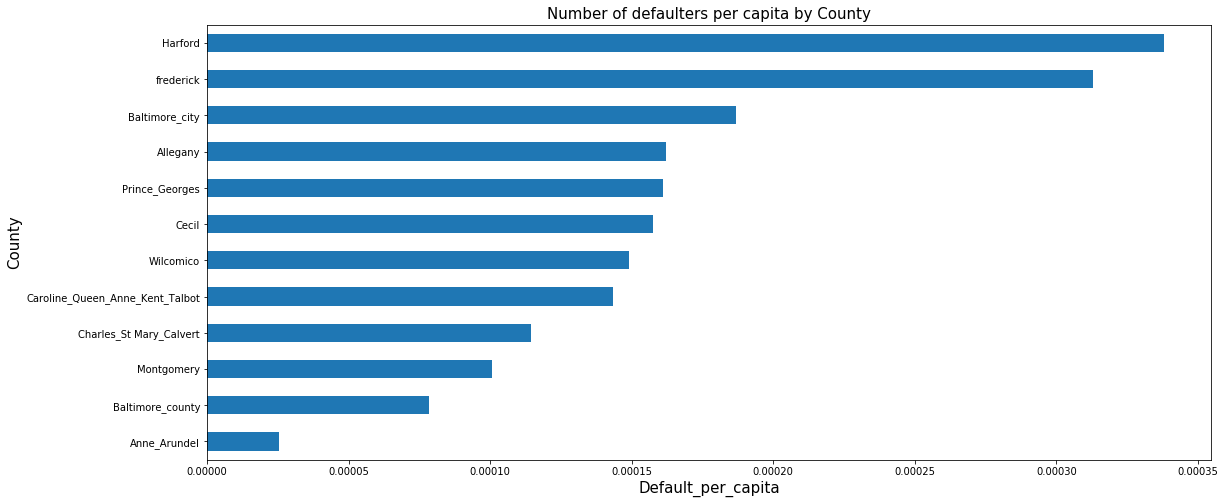

In [41]:
#Visualizing the number of defaulters per Capita for the Counties in Maryland.
clean_data_MD_counties['Defaulter_per_capita'].sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of defaulters per capita by County',fontsize=15)
plt.xlabel('Default_per_capita',fontsize=15)
plt.ylabel('County',fontsize=15);

The counties with income in the middle will default more than any other category. The fact that they borrow more than other categories will explain that: been in the middle mean, you only have enough income to fullfill the basic needs. If you really want to experience the type of life for those with high income you have to borrow money and some time paying back is not easy. Let us add a column with the percentage of defaulters by number of loans.

In [42]:
clean_data_MD_counties['Defaulter_percent'] = (clean_data_MD_counties['Number_of_defaults']/ clean_data_MD_counties['Number_of_loan'])*100
clean_data_MD_counties.Defaulter_percent.sort_values()

County
Montgomery                         13.133940
Charles_St Mary_Calvert            14.545455
Baltimore_county                   14.883721
Harford                            15.300546
Wilcomico                          16.483516
Baltimore_city                     16.666667
Anne_Arundel                       16.867470
Prince_Georges                     18.298969
frederick                          18.987342
Caroline_Queen_Anne_Kent_Talbot    19.801980
Cecil                              23.529412
Allegany                           24.489796
Name: Defaulter_percent, dtype: float64

Prince Gorges County is again amount the the top 5, the average income may be misleading and future work may require break down this study by zipcodes in each County: in the same county, some zipcode comprise most of the high earners and other most of the low earners. Unfortunately, the zipcode in the Lending Club data was partially masked and we couldn't really break down by zipcodes.

We will now move into the modeling Phase. Before we do that, we will consider dropping more columns, look at what will be our target and transform some categorical data into numeric using one hot encoding. Let see the data type we have by running the code below

Text(0, 0.5, 'Data type')

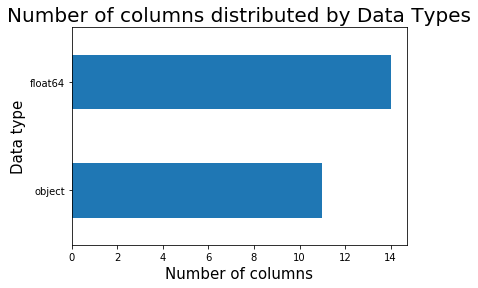

In [43]:
# Number of each type of column
import matplotlib.pyplot as plt
clean_data.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

We have 14 column that are numeric and 11 column with categorical values.

In [44]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188056 entries, 0 to 188180
Data columns (total 25 columns):
loan_amnt               188056 non-null float64
term                    188056 non-null object
int_rate                188056 non-null object
installment             188056 non-null float64
grade                   188056 non-null object
emp_length              188056 non-null float64
home_ownership          188056 non-null object
annual_inc              188056 non-null float64
verification_status     188056 non-null object
loan_status             188056 non-null object
purpose                 188056 non-null object
zip_code                188056 non-null object
addr_state              188056 non-null object
dti                     188056 non-null float64
delinq_2yrs             188056 non-null float64
earliest_cr_line        188056 non-null object
fico_range_low          188056 non-null float64
fico_range_high         188056 non-null float64
inq_last_6mths          188056 non-

In [45]:
#Removing the symbol % and converting column from object to float64 for 'int-rate' and 'revol_util'
clean_data.int_rate = clean_data.int_rate.str.replace("%","")
clean_data[['int_rate']] = clean_data[['int_rate']].apply(pd.to_numeric) 

clean_data.revol_util = clean_data.revol_util.str.replace("%","")
clean_data[['revol_util']] = clean_data[['revol_util']].apply(pd.to_numeric) 

In [46]:
#Determining how long a credit line was held by borrower in our dataset taking end of December 2013 as end date.
clean_data['earliest_cr_line'] = clean_data['earliest_cr_line'].apply(pd.to_datetime, errors = 'coerce')
end = np.datetime64('2013-12', 'D')
clean_data['earliest_cr_line'] = pd.Timestamp(end) - clean_data['earliest_cr_line']
clean_data['earliest_cr_line'] = clean_data['earliest_cr_line'] / np.timedelta64(1, 'D')
mean = clean_data['earliest_cr_line'].mean()
clean_data['earliest_cr_line'].fillna(mean, inplace=True)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188056 entries, 0 to 188180
Data columns (total 25 columns):
loan_amnt               188056 non-null float64
term                    188056 non-null object
int_rate                188056 non-null float64
installment             188056 non-null float64
grade                   188056 non-null object
emp_length              188056 non-null float64
home_ownership          188056 non-null object
annual_inc              188056 non-null float64
verification_status     188056 non-null object
loan_status             188056 non-null object
purpose                 188056 non-null object
zip_code                188056 non-null object
addr_state              188056 non-null object
dti                     188056 non-null float64
delinq_2yrs             188056 non-null float64
earliest_cr_line        188056 non-null float64
fico_range_low          188056 non-null float64
fico_range_high         188056 non-null float64
inq_last_6mths          188056 no

In [47]:
#'zip_code', 'grade' and 'addr_state' will be dropped
clean_data = clean_data.drop(columns=['zip_code', 'grade', 'addr_state'], axis=1)

In [48]:
# We will be targeting the loans that will default, the loan_status will help with that
clean_data['loan_status'].value_counts()

Fully Paid     158407
Charged Off     29649
Name: loan_status, dtype: int64

In [49]:
#We will binarize the column loan status by replacing the good loan with 1 and the Default with 0.
import numpy as np
clean_data['loan_status'] = np.where(clean_data.loan_status == 'Fully Paid', 1, 0)
clean_data['loan_status'].value_counts()

1    158407
0     29649
Name: loan_status, dtype: int64

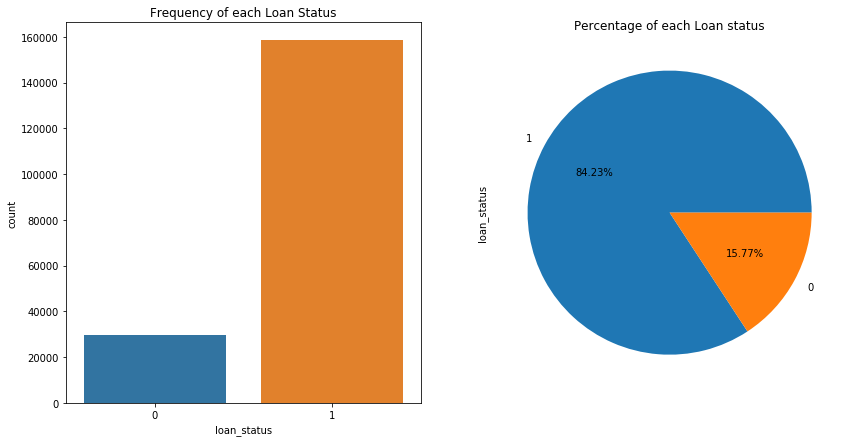

In [50]:
#Visualizing our target loan status
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=clean_data,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
clean_data.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

Our dataset is very unbalanced.

In [51]:
#Get categorical columns
cat_col = clean_data.columns[clean_data.dtypes==object] 

#Create dummy variables
clean_data_dummy = pd.get_dummies(clean_data[cat_col]) 

#Drop categorical columns already encoded
clean_data.drop(cat_col, axis=1, inplace=True) 

#Join the dummy variables to original dataframe
clean_data = clean_data.join(clean_data_dummy) 

In [52]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188056 entries, 0 to 188180
Data columns (total 41 columns):
loan_amnt                              188056 non-null float64
int_rate                               188056 non-null float64
installment                            188056 non-null float64
emp_length                             188056 non-null float64
annual_inc                             188056 non-null float64
loan_status                            188056 non-null int32
dti                                    188056 non-null float64
delinq_2yrs                            188056 non-null float64
earliest_cr_line                       188056 non-null float64
fico_range_low                         188056 non-null float64
fico_range_high                        188056 non-null float64
inq_last_6mths                         188056 non-null float64
open_acc                               188056 non-null float64
pub_rec                                188056 non-null float64
revol_bal

In [53]:
clean_data.shape

(188056, 41)

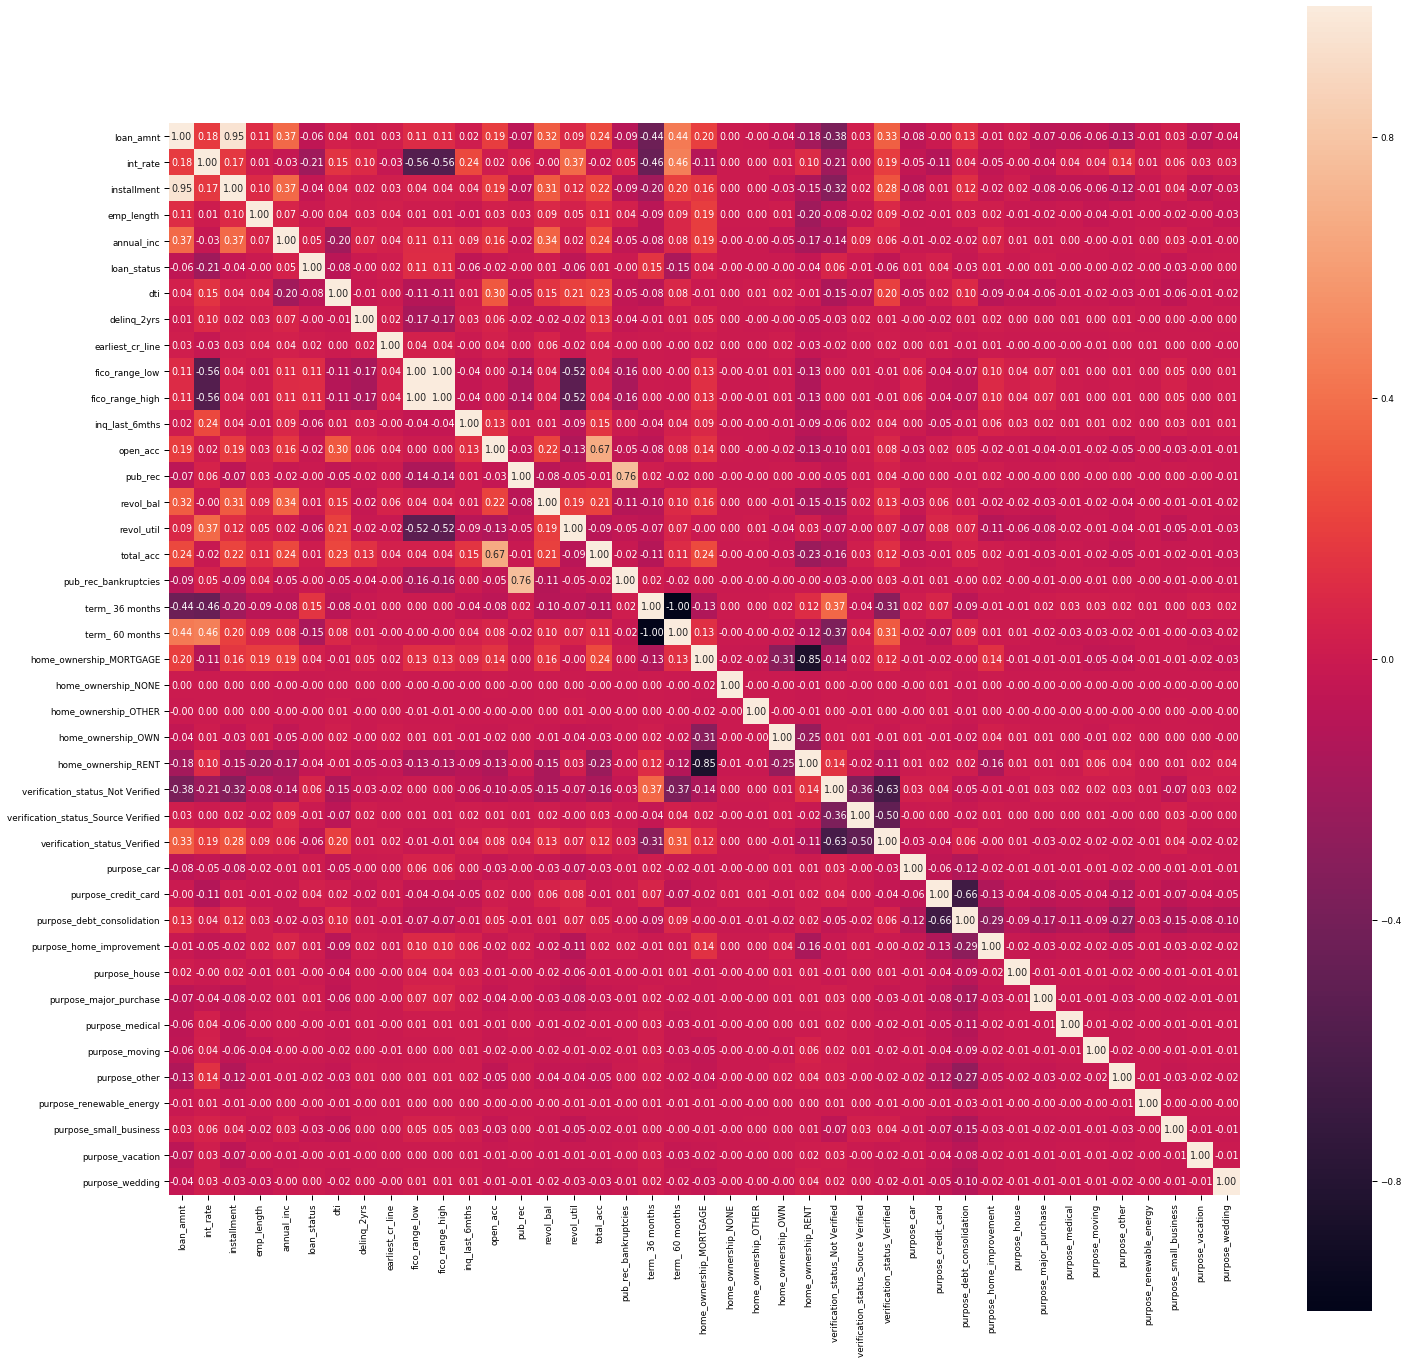

In [54]:
#Checking the correlation between our variables to see if we can further reduce the number of columns
plt.figure(figsize=(24,24))
sns.set_context("paper", font_scale=1)
sns.heatmap(clean_data.corr(), vmax=1, square=True, annot=True, fmt='.2f')


installment and loan amount, home_ownership_RENT and home_ownership_MORTGAGE, pub_rec_bankruptcies and pub_rec are highly correlated. installment, home_ownership_MORTGAGE and pub_rec will be dropped

In [55]:
clean_data = clean_data.drop(columns=['installment', 'home_ownership_MORTGAGE', 'pub_rec'], axis=1)
clean_data.shape

(188056, 38)

In [56]:
#Setting up the target and the varibles
target = clean_data['loan_status']
clean_data = clean_data.drop('loan_status', axis=1)
X = clean_data
y = target


In [57]:
#Scaling the data down
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(X)

LR: 0.841893 (0.005271)
DT: 0.735563 (0.005231)
AB: 0.842228 (0.005414)
GB: 0.842302 (0.005469)
RF: 0.841696 (0.005294)


[Text(0, 0, 'LR'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'AB'),
 Text(0, 0, 'GB'),
 Text(0, 0, 'RF')]

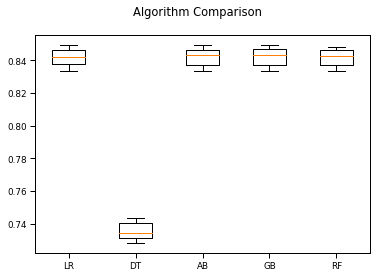

In [58]:
from sklearn import model_selection
# prepare configuration for cross validation test harness on the imbalanced data
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)


AdaBoostClassifier, GradientBoostingClassifier are the best two classifiers for the lending club dataset in study, they are followed by LogisticRegression and RandomForestClassifier. DecisionTreeClassifier is the worse of the 5 classifiers. We will use GradientBoostingClassifier, AdaBoostClassifier and RandomForestClasifier to classify the data.

In [59]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate a GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

# Instantiate  a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)

In [61]:
# Fit AdaBoostClassifier
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [62]:
# Fit GradientBoostingClassifier
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
#Fit RandomForestClassifier
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

We will use these models to predict labels on both the training and test sets:

In [64]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

#RandomForest model predictions
forest_train_preds = forest.predict(X_train)
forest_test_preds = forest.predict(X_test)


Using the following function we can calculate the accuracy and f1-score for each model:

In [65]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
display_acc_and_f1_score(y_train, forest_train_preds, model_name='Random Forest')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')
print("")
display_acc_and_f1_score(y_test, forest_test_preds, model_name='Random Forest')
print("")

Training Metrics
Model: AdaBoost
Accuracy: 0.8425575360530906
F1-Score: 0.9144962804380304

Model: Gradient Boosted Trees
Accuracy: 0.8425788063130132
F1-Score: 0.9145358035050982

Model: Random Forest
Accuracy: 0.8424440946668368
F1-Score: 0.9144853807020649

Testing Metrics
Model: AdaBoost
Accuracy: 0.8420470498149487
F1-Score: 0.9142058320624799

Model: Gradient Boosted Trees
Accuracy: 0.8418981579954907
F1-Score: 0.9141517387939897

Model: Random Forest
Accuracy: 0.8420257795550261
F1-Score: 0.9142388656020138



All models have about the same accuracy scores and F1-Score for the Training Metrics and the Testing Metric are very close. This imply that our model maybe either overfitting or only predicting the loan that will not default because of the imbalance nature of our data. The confusion matrix may help determining how well our models are really performing.

Accuracy (test): 0.842
Precision (test): 0.842
Recall (test): 1.000


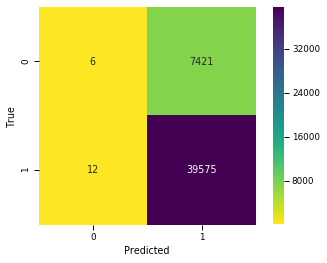

In [66]:
#Confusion matrix for Gradient Boosted Tree
acc_test = accuracy_score(y_test, gbt_clf_test_preds)
prec_test = precision_score(y_test, gbt_clf_test_preds)
rec_test = recall_score(y_test, gbt_clf_test_preds)
print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}''')

cm = confusion_matrix(y_test, gbt_clf_test_preds)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

For the Gradient Boosted we have: TP = 6, FP = 12, FN = 7421 and TN = 39575

Accuracy (test): 0.842
Precision (test): 0.842
Recall (test): 0.999


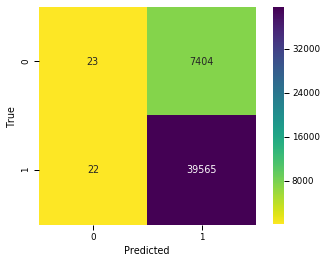

In [67]:
#Confusion matrix for Adaboost Boosted Tree
acc_test = accuracy_score(y_test, adaboost_test_preds)
prec_test = precision_score(y_test, adaboost_test_preds)
rec_test = recall_score(y_test, adaboost_test_preds)
print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}''')

cm = confusion_matrix(y_test, adaboost_test_preds)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

For the adaboost we have: TP = 23, FP = 22, FN = 7404 and TN = 39565

Accuracy (test): 0.842
Precision (test): 0.842
Recall (test): 1.000


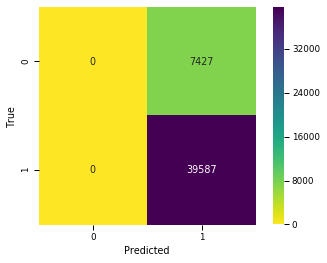

In [68]:
#Confusion matrix for RandomForest Tree
acc_test = accuracy_score(y_test, forest_test_preds)
prec_test = precision_score(y_test, forest_test_preds)
rec_test = recall_score(y_test, forest_test_preds)
print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}''')

cm = confusion_matrix(y_test, forest_test_preds)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

RandomForest appears to be the worse classifier out of the three used with TP = 0. We will now genrate the classification report for each of the classifier and will be able to make a conclusion as which of the classifier is the least worse of the three.

In [69]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.51      0.00      0.01      7427
           1       0.84      1.00      0.91     39587

    accuracy                           0.84     47014
   macro avg       0.68      0.50      0.46     47014
weighted avg       0.79      0.84      0.77     47014



In [70]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.33      0.00      0.00      7427
           1       0.84      1.00      0.91     39587

    accuracy                           0.84     47014
   macro avg       0.59      0.50      0.46     47014
weighted avg       0.76      0.84      0.77     47014



In [71]:
gbt_classification_report = classification_report(y_test, forest_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7427
           1       0.84      1.00      0.91     39587

    accuracy                           0.84     47014
   macro avg       0.42      0.50      0.46     47014
weighted avg       0.71      0.84      0.77     47014



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


adaboost appears to be the least worse of the three classifiers. We must now balanced our data and see how each of the classifier will perform. We will use SMOTE(Synthetic Minority Oversampling TEchnique) to resample the minority.

In [73]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_b, y_b = smote.fit_sample(X, y)

We will now re-run most of the code above and see how our classifiers will perform on a balance dataset.

In [75]:
# Split the data into training and test sets for balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
# Instantiate an AdaBoostClassifier for balanced dataset
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate a GradientBoostingClassifier for balaced dataset
gbt_clf = GradientBoostingClassifier(random_state=42)

# Instantiate  a RandomForestClassifier for balanced dataset
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)

In [79]:
# Fit AdaBoostClassifier for balanced dataset
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [80]:
# Fit GradientBoostingClassifier for balanced dataset
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [81]:
#Fit RandomForestClassifier for balanced dataset
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
# AdaBoost model predictions for balanced dataset
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions for balanced dataset
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

#RandomForest model predictions for balanced dataset
forest_train_preds = forest.predict(X_train)
forest_test_preds = forest.predict(X_test)

In [83]:
# For balanced dataset
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
display_acc_and_f1_score(y_train, forest_train_preds, model_name='Random Forest')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')
print("")
display_acc_and_f1_score(y_test, forest_test_preds, model_name='Random Forest')
print("")

Training Metrics
Model: AdaBoost
Accuracy: 0.7518117924329785
F1-Score: 0.7524099015886877

Model: Gradient Boosted Trees
Accuracy: 0.8449097260216321
F1-Score: 0.854159988285625

Model: Random Forest
Accuracy: 0.6929843020074913
F1-Score: 0.6808529254783925

Testing Metrics
Model: AdaBoost
Accuracy: 0.7527397606181506
F1-Score: 0.7524584776398615

Model: Gradient Boosted Trees
Accuracy: 0.8457274885106812
F1-Score: 0.8547656686436952

Model: Random Forest
Accuracy: 0.6919726276450684
F1-Score: 0.6791852407064053



The confusion matrix may help determining how well our models are really performing with the balanced dataset.

Accuracy (test): 0.846
Precision (test): 0.806
Recall (test): 0.910


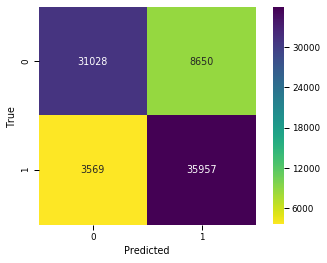

In [84]:
#Confusion matrix for Gradient Boosted Tree
acc_test = accuracy_score(y_test, gbt_clf_test_preds)
prec_test = precision_score(y_test, gbt_clf_test_preds)
rec_test = recall_score(y_test, gbt_clf_test_preds)
print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}''')

cm = confusion_matrix(y_test, gbt_clf_test_preds)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

Accuracy (test): 0.753
Precision (test): 0.752
Recall (test): 0.753


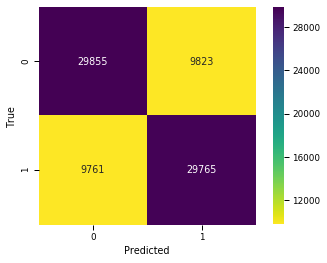

In [85]:
#Confusion matrix for Adaboost Boosted Tree
acc_test = accuracy_score(y_test, adaboost_test_preds)
prec_test = precision_score(y_test, adaboost_test_preds)
rec_test = recall_score(y_test, adaboost_test_preds)
print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}''')

cm = confusion_matrix(y_test, adaboost_test_preds)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

Accuracy (test): 0.692
Precision (test): 0.707
Recall (test): 0.653


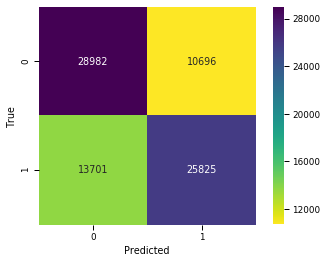

In [86]:
#Confusion matrix for RandomForest Tree
acc_test = accuracy_score(y_test, forest_test_preds)
prec_test = precision_score(y_test, forest_test_preds)
rec_test = recall_score(y_test, forest_test_preds)
print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}''')

cm = confusion_matrix(y_test, forest_test_preds)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

With the balanced dataset, the result has improved greatly and Gradient Boost Tree is the best classifier to use in this prediction model. Let us look at the classification report.

In [87]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.90      0.78      0.84     39678
           1       0.81      0.91      0.85     39526

    accuracy                           0.85     79204
   macro avg       0.85      0.85      0.85     79204
weighted avg       0.85      0.85      0.85     79204



Base on the classification report above, Gradient Boost Tree classifier can equally predict if a loan will be defaulted or no; the data need to be balanced for a good prediction.

In [ ]:
#randomly creating a new loan applicant
import random
random.seed(42) ##Keeping same random numbers 
random_ind = random.randint(0,len(clean_data))

new_loan_applicant = clean_data.drop('Fully Paid',axis=1).iloc[random_ind]
new_loan_applicant

In [ ]:
#Testing the model for a new loan applicant